# Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=10, n_features=1, n_informative=1, n_redundant=0 , n_clusters_per_class=1, flip_y=0, random_state=7)

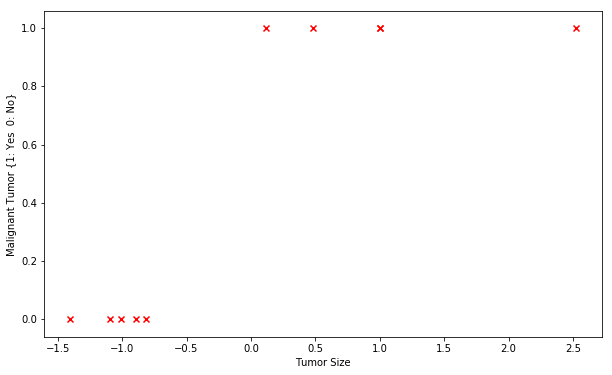

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, c='red', marker='x')
plt.ylabel("Malignant Tumor {1: Yes  0: No}")
plt.xlabel("Tumor Size")
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
z = np.linspace(-2, 2, 1000)
z_predict = lm.intercept_ + (lm.coef_ * z)

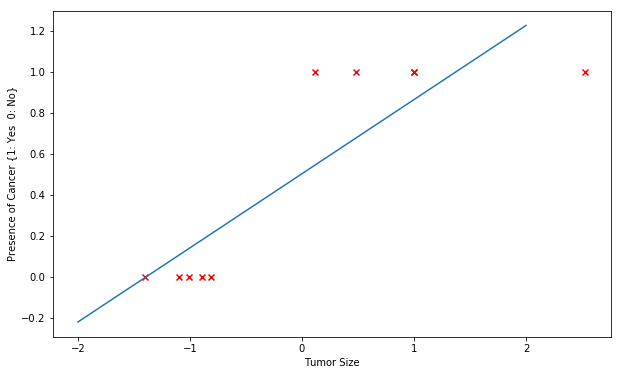

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, c='red', marker='x')
plt.plot(z, z_predict)
plt.ylabel("Presence of Cancer {1: Yes  0: No}")
plt.xlabel("Tumor Size")
plt.show()


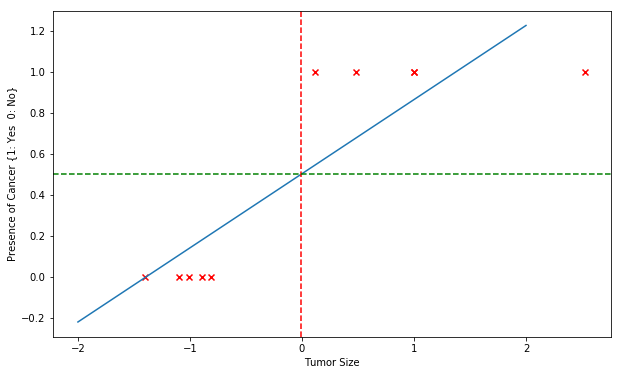

In [7]:
## now tracing horizontal and vertical line 

x_critical = (0.5 - lm.intercept_)/ lm.coef_     #( y = mx + c ) where c is intercept , m is coefficient and y = 0.5 whcih we want

plt.figure(figsize=(10,6))
plt.scatter(X, y, c='r', marker='x')
plt.plot(z, z_predict)
plt.axvline(x=x_critical, color='r', linestyle='--')
plt.axhline(y=0.5, color='g', linestyle='--')
plt.ylabel("Presence of Cancer {1: Yes  0: No}")
plt.xlabel("Tumor Size")

In [8]:
#### Now lets explain the issue of this if we have a outlier 


new_obs = 20     ## adding outlier 
X = np.vstack([X, new_obs])    # stack up outlier 
y = np.append(y, 1)     # stach up outlier outcome 
lm = LinearRegression()
lm.fit(X, y)
z = np.linspace(-2, new_obs, 1000)
z_predict = lm.intercept_ + (lm.coef_ * z)
x_critical2 = (0.5 - lm.intercept_)/ lm.coef_

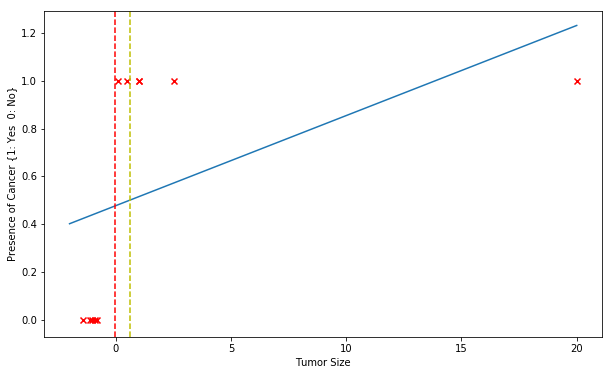

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, c='r', marker='x')
plt.plot(z, z_predict)
plt.axvline(x=x_critical, color='r', linestyle='--')
plt.axvline(x=x_critical2, color='y', linestyle='--')
plt.ylabel("Presence of Cancer {1: Yes  0: No}")
plt.xlabel("Tumor Size")
plt.show()          
    

# Now we will go to do Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=10, n_features=1, n_informative=1, n_redundant=0 , n_clusters_per_class=1, flip_y=0, random_state=7)
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

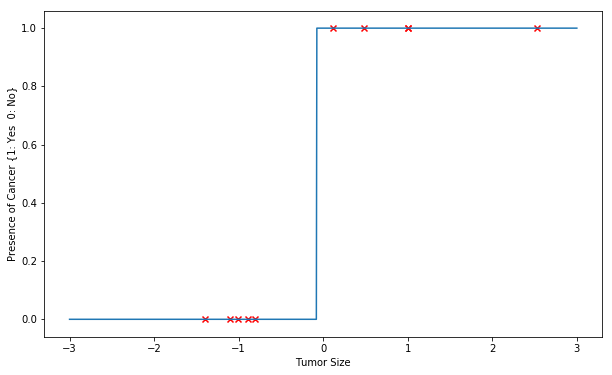

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, c='r', marker='x')
xt = np.linspace(-3, 3, 1000).reshape(1000,1)
yt = clf.predict(xt)
plt.plot(xt, yt)
plt.ylabel("Presence of Cancer {1: Yes  0: No}")
plt.xlabel("Tumor Size")

In [12]:
## for an outlier problem 


# append an outlier 
new_obs = 20
X = np.vstack([X, new_obs])
y = np.append(y, 1)
clf.fit(X, y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

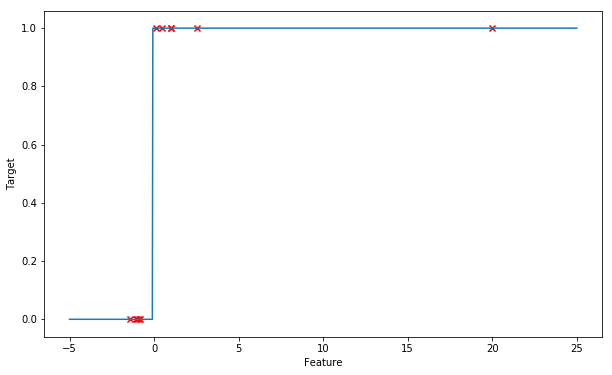

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, c='r', marker='x')
xt = np.linspace(-5, 25, 1000).reshape(1000,1)
yt = clf.predict(xt)
plt.plot(xt, yt)
plt.xlabel('Feature')
plt.ylabel('Target')

In [15]:
############# Another problem from load prediction data 


import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

dataframe = pd.read_csv(r'D:\Others\PythonCode\MLinAction\Log reg data\loanprediction.csv')
X = dataframe.iloc[:,:-1]
y = dataframe.iloc[:,-1]

X


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,0.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
5,5417,4196.0,267.0,360.0,1.0
6,2333,1516.0,95.0,360.0,1.0
7,3036,2504.0,158.0,360.0,0.0
8,4006,1526.0,168.0,360.0,1.0
9,12841,10968.0,349.0,360.0,1.0


In [16]:
y

0      1
1      0
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      0
10     1
11     1
12     1
13     0
14     1
15     1
16     1
17     0
18     0
19     1
20     0
21     1
22     0
23     0
24     0
25     1
26     1
27     1
28     0
29     1
      ..
584    0
585    0
586    1
587    1
588    1
589    0
590    1
591    0
592    1
593    1
594    1
595    1
596    0
597    0
598    1
599    1
600    0
601    1
602    1
603    1
604    1
605    0
606    1
607    1
608    1
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, dtype: int64

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)
logistic_regressor = LogisticRegression()
pipeline = Pipeline(steps=[('add_poly_features', PolynomialFeatures()),('logistic_regression', logistic_regressor)])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print (accuracy_score(y_test, y_pred))

0.6972972972972973
